# 1. Spam Data

- Load the spam data set.
- Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?
- Is there any overlap in the bigrams for the spam data and the ham data?
- Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham dat

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import nltk
import unicodedata
import re
import matplotlib.pyplot as plt
import seaborn as sns

# acquire data from spam_db

from env import user, password, host

def get_db_url(database, host=host, user=user, password=password):
    return f'mysql+pymysql://{user}:{password}@{host}/{database}'


url = get_db_url("spam_db")
sql = "SELECT * FROM spam"

df = pd.read_sql(sql, url, index_col="id")
df.head()

,label,text
id,,
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [2]:
ADDITIONAL_STOPWORDS = ['r', 'u', '2', 'ltgt']

def clean(text):
    'A simple function to cleanup text data'
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
    text = (unicodedata.normalize('NFKD', text)
             .encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]


In [3]:
ham_words = clean(' '.join(df[df.label == 'ham'].text))
spam_words = clean(' '.join(df[df.label == 'spam'].text))
all_words = clean(' '.join(df.text))

ham_freq = pd.Series(ham_words).value_counts()
spam_freq = pd.Series(spam_words).value_counts()
all_freq = pd.Series(all_words).value_counts()

In [4]:
word_counts = (pd.concat([all_freq, ham_freq, spam_freq], axis=1, sort=True)
                .set_axis(['all', 'ham', 'spam'], axis=1, inplace=False)
                .fillna(0)
                .apply(lambda s: s.astype(int)))

word_counts.head()


,all,ham,spam
0,3,0,3
008704050406,2,0,2
0089my,1,0,1
0121,1,0,1
01223585236,1,0,1


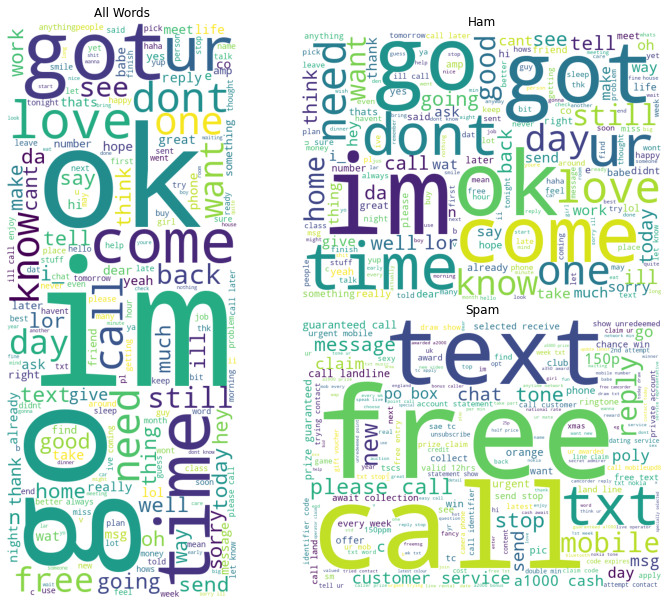

In [5]:
from wordcloud import WordCloud

all_cloud = WordCloud(background_color='white', height=1000, width=400).generate(' '.join(all_words))
ham_cloud = WordCloud(background_color='white', height=600, width=800).generate(' '.join(ham_words))
spam_cloud = WordCloud(background_color='white', height=600, width=800).generate(' '.join(spam_words))

plt.figure(figsize=(10, 8))
axs = [plt.axes([0, 0, .5, 1]), plt.axes([.5, .5, .5, .5]), plt.axes([.5, 0, .5, .5])]

axs[0].imshow(all_cloud)
axs[1].imshow(ham_cloud)
axs[2].imshow(spam_cloud)

axs[0].set_title('All Words')
axs[1].set_title('Ham')
axs[2].set_title('Spam')

for ax in axs: ax.axis('off')


In [6]:
top_20_ham_bigrams = (pd.Series(nltk.ngrams(ham_words, 2))
                      .value_counts()
                      .head(20))

top_20_ham_bigrams


(call, later)      52
(ill, call)        48
(let, know)        42
(sorry, ill)       39
(dont, know)       32
(good, morning)    31
(new, year)        30
(take, care)       26
(im, going)        24
(ok, lor)          22
(pls, send)        22
(im, gonna)        20
(good, night)      19
(happy, new)       19
(wat, time)        18
(last, night)      18
(hi, hi)           18
(great, day)       17
(dont, want)       15
(want, go)         15
dtype: int64

In [7]:
top_20_spam_bigrams = (pd.Series(nltk.ngrams(spam_words, 2))
                      .value_counts()
                      .head(20))

top_20_spam_bigrams.head()


(please, call)         44
(customer, service)    27
(po, box)              24
(a1000, cash)          23
(guaranteed, call)     23
dtype: int64

In [69]:
top_20_ham_bigrams.to_dict().items()

dict_items([(('call', 'later'), 52), (('ill', 'call'), 48), (('let', 'know'), 42), (('sorry', 'ill'), 39), (('dont', 'know'), 32), (('good', 'morning'), 31), (('new', 'year'), 30), (('take', 'care'), 26), (('im', 'going'), 24), (('ok', 'lor'), 22), (('pls', 'send'), 22), (('im', 'gonna'), 20), (('good', 'night'), 19), (('happy', 'new'), 19), (('wat', 'time'), 18), (('last', 'night'), 18), (('hi', 'hi'), 18), (('great', 'day'), 17), (('dont', 'want'), 15), (('want', 'go'), 15)])

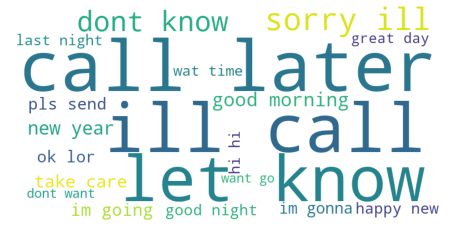

In [8]:
data = {k[0] + ' ' + k[1]: v for k, v in top_20_ham_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

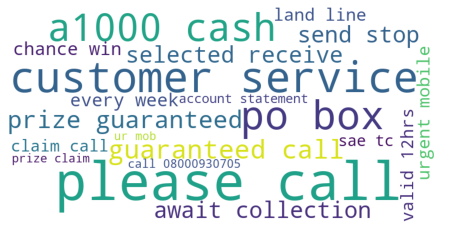

In [9]:
data = {k[0] + ' ' + k[1]: v for k, v in top_20_spam_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

# 2. Explore the blog articles using the techniques discussed in the exploration lesson.

In [10]:
import acquire
from bs4 import BeautifulSoup as soupify

In [25]:
blog_posts=pd.DataFrame([acquire.get_blog_articles(x) for x in acquire.articles])

In [26]:
  blog_posts.head()

,title,content
0,How Can I Finance My Career Transition?,Deciding to transition into a tech career is a...
1,Diversity Equity and Inclusion Report,Codeup is excited to launch our first Diversit...
2,Codeup Honored as SABJ Diversity and Inclusion...,Codeup has been named the 2022 Diversity and I...
3,Tips for Women Beginning a Career in Tech,"Codeup strongly values diversity, and inclusio..."
4,What is Cloud Computing and AWS?,With many companies switching to cloud service...


In [27]:
blog_posts['cleaned']=blog_posts.content.apply(clean)

In [57]:
blog_posts

,title,content,cleaned
0,How Can I Finance My Career Transition?,Deciding to transition into a tech career is a...,"[deciding, transition, tech, career, big, step..."
1,Diversity Equity and Inclusion Report,Codeup is excited to launch our first Diversit...,"[codeup, excited, launch, first, diversity, eq..."
2,Codeup Honored as SABJ Diversity and Inclusion...,Codeup has been named the 2022 Diversity and I...,"[codeup, named, 2022, diversity, inclusion, aw..."
3,Tips for Women Beginning a Career in Tech,"Codeup strongly values diversity, and inclusio...","[codeup, strongly, value, diversity, inclusion..."
4,What is Cloud Computing and AWS?,With many companies switching to cloud service...,"[many, company, switching, cloud, service, imp..."


In [58]:
bigram_list=[]
for x in range(0,4):
    variable=pd.Series(nltk.ngrams(blog_posts.cleaned[x], 2)).value_counts()
    bigram_list.append(variable)

In [64]:
bigram_list=pd.Series(bigram_list)

In [70]:
blog_posts=pd.concat([blog_posts,bigram_list],axis=1)

In [71]:
blog_posts

,title,content,cleaned,0
0,How Can I Finance My Career Transition?,Deciding to transition into a tech career is a...,"[deciding, transition, tech, career, big, step...","(day, class) 3 (first, day) 3 ..."
1,Diversity Equity and Inclusion Report,Codeup is excited to launch our first Diversit...,"[codeup, excited, launch, first, diversity, eq...","(codeup, excited) 1 (tech, industry) ..."
2,Codeup Honored as SABJ Diversity and Inclusion...,Codeup has been named the 2022 Diversity and I...,"[codeup, named, 2022, diversity, inclusion, aw...","(codeup, named) 1 (ensuring, diversi..."
3,Tips for Women Beginning a Career in Tech,"Codeup strongly values diversity, and inclusio...","[codeup, strongly, value, diversity, inclusion...","(career, tech) 3 (woman, tech) ..."
4,What is Cloud Computing and AWS?,With many companies switching to cloud service...,"[many, company, switching, cloud, service, imp...",NaN


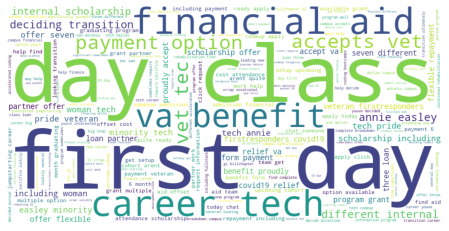

In [72]:
#used iloc to specify the first row blog artile and make a word cloud

data = {k[0] + ' ' + k[1]: v for k, v in blog_posts.iloc[0,3].to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()